In [12]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Introduction to the exercise
In this exercise you will implement and apply PCA to a database consisting of face shapes. The implementation is also needed for assignment 2. 

**Important**
This exercise and the in-class exercise overlap, but use different datasets. In this exercise you should use your implementation from the in-class exercise.

## Data
The dataset used for the assigment consists of 120 landmarks (2D points) of faces (data space). A face consists of 73 (x,y)-coordinate pairs, i.e. 146 featues in total.
The following cell imports the necessary libraries, loads the data and uses the function `plot_many_faces`
 to  visualize 6 faces.


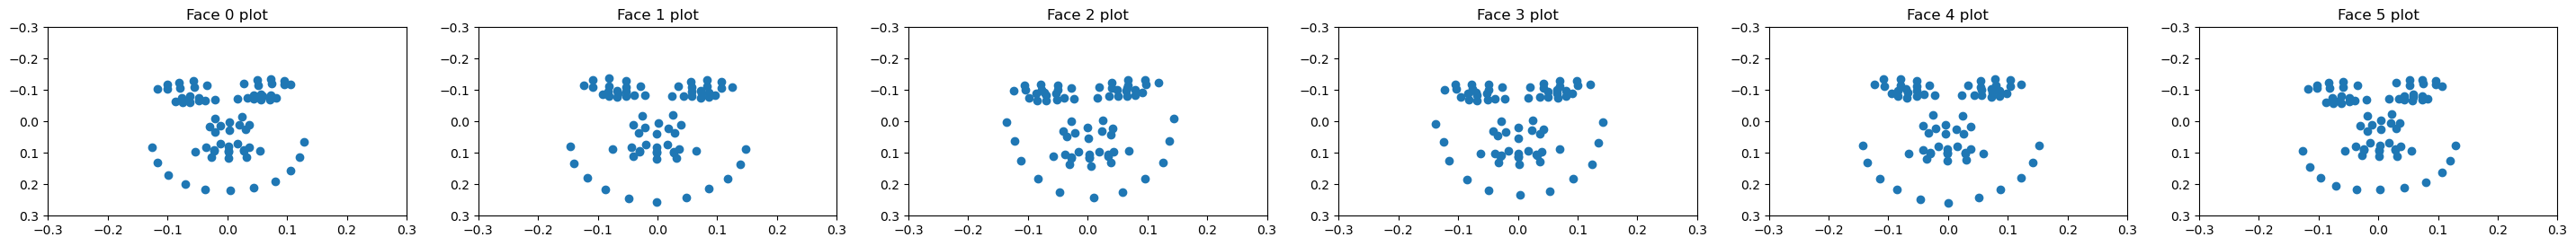

In [13]:
import matplotlib.pyplot as plt
import numpy as np

from utils import *

path = './db'
shapes, images = face_shape_data(path)
plot_many_faces(shapes[:6])

## Implementing PCA
An application of principal component analysis is about finding a linear transformation
that reduces the number of dimensions used to represent the data while
retaining a certain proportion of the variation. 
Let $X$ $\in \mathbb{R}^{N \times D}$ be the data matrix, $C$ $\in \mathbb{R}^{D \times D}$ the covariance matrix of $X$, and $V$ $\in \mathbb{R}^{D \times D}$ the matrix of eigenvectors of $C$:

$$

{V} = \begin{bmatrix} | & | & & | \\ \vec{v}_1 & \vec{v}_2 & \cdots & \vec{v}_D  \\ | & | & & | \end{bmatrix}.

$$
The eigenvectors ${v}_i$ are sorted according to their eigenvalues $\lambda_i$. $\lambda_i$ is a measure of the variance of each dimension in latent space. The eigenvalues explain
the variance of each dimension when that data has been transformed by
PCA. The sum of all eigenvalues $\lambda^{(1)}+\dots+\lambda^{(D)}$ is
equal to the total variance of the data. 
(1) **Proportional variance** is the proportion of the total variance explained by a single component. 

$$\frac{\lambda^{(i)}}{\lambda^{(1)} + \dots + \lambda^{(D)}}$$
(2) **Cumulative variance** is the cumulative proportion of the total variance explained by the first $k$ components.

$$\frac{\lambda^{(1)} + \dots + \lambda^{(k)}}{\lambda^{(1)} + \dots + \lambda^{(D)}}$$
Define $\Phi$, as the $D\times k$ matrix of the first $k$ eigenvectors of $V$:

$$

{\Phi} = \begin{bmatrix} | & | & & | \\ \vec{v}_1 & \vec{v}_2 & \cdots & \vec{v}_k \\ | & | & & | \end{bmatrix}.

$$
The column vectors of ${\Phi}$ constitute the basis of the latent space. ${\Phi}$ can be used to transform data points between the data space and the latent space. Mapping a point $x$ to the latent space:

$$ 
\mathbf{a} = \mathbf{\Phi}^\top(\mathbf{x}-\mathbf{\mu}),
$$
and back into data space:

$$
x + \epsilon = \mathbf{\Phi} \mathbf{a} + \mathbf{\mu},
$$
may result in a _reconstruction error_ $\epsilon$, where $\mathbf{x}\in\mathbb{R}^D$ is the input vector, $\mathbf{a}\in\mathbb{R}^k$ is the corresponding vector in latent space and ${\mu}$ is the mean vector in data space.

---
**Task 1 (easy): Reconstruction💡**
1. Why do we get a reconstruction error $\epsilon$?
2. What is the expected error $\epsilon$ when $k=D$? 
3. (Optional) Show 2 mathematically. 
4. What is the expected error when we change $k$?


---

In [14]:
# write answers here

The next task is to implement PCA and transform data between data space and latent space.

---
**Task 2 (medium): PCA implementation👩‍💻**
1. **Implement PCA:** Create a function that calculates and returns all principle components of the dataset. **Make sure to center the samples (subtract the mean before calculating the covariance matrix)**.

2. **Calculate variance:** Create functions that calculate the _proportional_ and _cumulative_ variance.

3. **Plot variance metrics:** Plot both the proportional and cumulative variance in a single plot. 

4. Create a function that transforms the data from the data space to latent space
( [Equation 1](#eq:trans) ) 



$$
 \mathbf{a} = \mathbf{\Phi}^\top(\mathbf{x}-\mathbf{\mu})
$$
5. Create a function that transforms the data from the  latent space to the data space
( [Equation 2](#eq:inv) ).


$$
 \mathbf{x} = \mathbf{\Phi} \mathbf{a} + \mathbf{\mu}
$$

**Tip**
Some of the later tasks will be easier if you return all 146 principle components. You can then create another function for extracting $k$ components to generate $\Phi$.


---

In [15]:
# Write your implementation here.
def get_sorted_eigen(X):
    '''
    Takes the data matrix and calculates the eigenvalues and vectors and sorts them based on the eigen values
    '''
    mean_v = np.mean(X)
    C = np.cov(X-mean_v, rowvar=False) # Center data matrix by subtracting the mean
    eig_values, eig_vecs = np.linalg.eigh(C)

    values = list(zip(eig_values, eig_vecs.T))
    values.sort(key=lambda x: x[0], reverse=True)

    sorted_eig_vec = []
    sorted_eig_values = []
    for v in values:
        sorted_eig_values.append(v[0])
        sorted_eig_vec.append()

    sorted_eig_vec = np.array(sorted_eig_vec).T
    sorted_eig_values = np.array(sorted_eig_values)

    return sorted_eig_values, sorted_eig_vec, mean_v

def get_eigen_varians(eig_values):
    '''
    Calculates both the proportional variance and cumulative variance.
    NOTE: This function assumes that the eig_values are sorted
    '''

    variance_sum = np.sum(eig_values)

    proportional_variance = eig_values / variance_sum
    cumulative_variance_ratio = np.cumsum(eig_values) / variance_sum

    return proportional_variance, cumulative_variance_ratio

def transform_latent(data, comp, mean):
    '''
    Goes through each data and performs transformation to latent space
    '''
    res = []

    for x in data:
        res.append(comp.T.dot(x - mean))

    return np.array(res)

def transform_real(data, comp, mean):
    '''
    Goes through each data and performs transformation to real space
    '''
    res = []

    for a in data:
        res.append(comp.dot(a) + mean)

    return np.array(res)


In [16]:
# Task 1 - Get eigen values and vectors
n_components = 146
val, comp, mu = get_sorted_eigen(shapes)

pro, cum = get_eigen_varians(val)

fig, ax = plt.subplots()
ax.plot(cum, 'o-', linewidth=1, color='red')
ax.plot(pro, 'o-', linewidth=1, color='blue')
ax.set_xlim(0,80)

used = comp[:,:n_components]
latent_transformed = transform_latent(shapes, used, mu)
transformed = transform_real(latent_transformed, used, mu)

print(transformed.shape)

TypeError: list.append() takes exactly one argument (0 given)

## Reconstruction error
In this task you will implement a method for calculating the reconstruction error and use it observe the effect of changing the number of principal components.
We will use the root mean square error (RMSE) to calculate the reconstruction error:

$$RMSE(x, \widetilde{x}) = \sqrt{\frac{1}{N}\sum_i (x_i-\widetilde{x}_i)^2},$$
where $x$, $\widetilde{x}$ are the original and transformed samples
respectively and $N$ is the total number of samples $x_i$.

---
**Task 3 (medium): Evaluating precision**
1. **Calculate reconstruction error:** Implement a function that calculates the reconstruction error given a dataset $X$, principle components $\Phi$, and a mean vector $\mu$.

2. **Plot reconstruction error:** Plot the reconstruction error for $k=1 .... D$. 



---

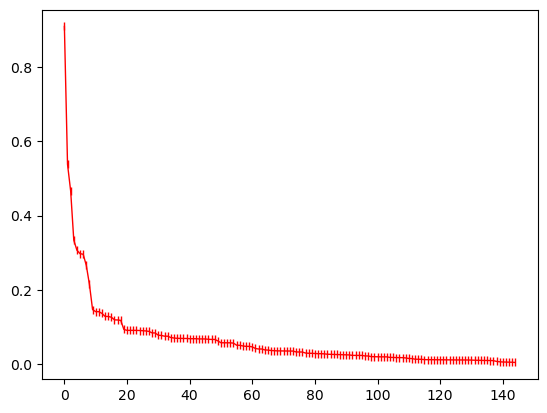

In [ ]:
def rmse_exp(real, transformed):
    n = real.shape[0]
    return (np.sum((real-transformed)**2)/n)**0.5

def rmse(real, transformed):
    n = real.shape[0]
    res = 0

    for i, x in enumerate(real):
        x_hat = transformed[i]

        res += np.sum((x-x_hat)**2)

    return (res/n)**0.5

errors = []

for k in range(1,n_components):
    used = comp[:,:k]
    trans_latent = transform_latent(shapes, used, mu)
    trans_real = transform_real(trans_latent, used, mu)

    errors.append(rmse(shapes, trans_real))

errors = np.array(errors)

plt.plot(errors, '|-', linewidth=1, color='red')
